# ***ADSORPTION USING AIIDALAB***


***Q1. Three types of calculations AiiDAlab offers for adsorption studies***

*Single-component adsorption isotherms* :
These are the fundamental calculations in adsorption studies and describe how much of a gas is taken up by a porous material at a constant temperature as the pressure increases. They provide direct information about adsorption capacity, the affinity of the material for the adsorbate, and the pressure range where uptake occurs. In AiiDAlab, these isotherms can be fitted to models such as Langmuir, BET, or Toth, allowing one to extract useful parameters that summarize adsorption behavior.

*Mixture adsorption via IAST (Ideal Adsorbed Solution Theory)*: 
Real-world separations typically involve mixtures of gases rather than pure components. IAST is a predictive framework that uses single-component isotherms as input to estimate how different gases will compete for adsorption sites. With this method, AiiDAlab can calculate mixture uptake and separation selectivity without the need for costly multicomponent simulations or experiments. This makes it especially useful for applications like CO₂ capture from flue gas or natural gas purification.

*Isosteric heat of adsorption*: 
This thermodynamic property measures the energy released when a gas molecule adsorbs into a porous material. AiiDAlab evaluates it by comparing isotherms collected at multiple temperatures and applying relations such as Clausius–Clapeyron. The isosteric heat reflects the strength of interaction between gas and material, and it highlights how this strength changes with loading. This information is crucial for balancing high uptake with energy-efficient regeneration in processes such as carbon capture.

***Q2. Physical properties of IRMOF-1***

The structural properties of porous crystalline materials can be quantified using probe-based simulations. Parameters such as density, accessible surface area (ASA), probe-occupiable accessible volume (POAV), and porosity provide insight into the material’s packing, internal voids, and potential for adsorption or diffusion. Here, the properties are presented for the studied material IRMOF-1, using a spherical probe of radius 1.525 Å.

**Results**

1. *Density*

* *Value:* 0.576983 g·cm⁻³
* *Description:* Density is the mass per unit volume of the framework. A relatively low density indicates a large void fraction, characteristic of porous solids.

2. *Accessible Surface Area (ASA)*

* *Value:* 3.96465 × 10³ Å² 
* *Description:* ASA represents the total surface area that a spherical probe (radius = 1.525 Å) can reach when “rolling” over the atomic framework. It quantifies the extent of internal surface available for adsorption or interaction with guest molecules.

3. *Probe-Occupiable Accessible Volume (POAV)*

* *Value:* 1.37374 × 10⁴ Å³ (equivalently 1.34316 cm³·g⁻¹)
* *Description:* POAV is the fraction of the unit cell volume that can be occupied by the **center** of the probe without overlap with the atoms. This defines the accessible pore volume available for potential guest species.

4. *Porosity*

* *Value:* 0.775 (≈ 77.5 %)
* *Description:* Porosity is calculated as the ratio of POAV to the total unit cell volume. For this material:

  $$
  \text{Porosity} = \frac{\text{POAV}}{\text{Unit cell volume}} = \frac{13737.4 \,\text{Å}^3}{17726.2 \,\text{Å}^3} \approx 0.775
  $$

  This indicates that approximately three-quarters of the unit cell is available as free volume accessible to the probe.

***Q3. Henry coefficients***

The Henry coefficient is a fundamental thermodynamic parameter that describes the proportionality between the concentration of a species in one phase and its partial pressure (or concentration) in another.

* *General definition:* In solution thermodynamics, Henry’s law states that the amount of gas dissolved in a liquid is proportional to its partial pressure in the gas phase, with the proportionality constant known as the Henry coefficient.
* *Applied to porous materials:* In adsorption studies, the Henry coefficient corresponds to the initial slope of the adsorption isotherm at very low pressure. It quantifies the affinity of an adsorbent toward a given gas molecule in the infinite dilution regime.

In this work, the Henry coefficients of CO₂ and CH₄ were calculated at 300 K.



***Results***

1. **CH₄ (Methane)**

* *Henry coefficient (average):* 1.12 × 10⁻⁶ mol·kg⁻¹·Pa⁻¹
* *Deviation:* 2.34 × 10⁻⁹ mol·kg⁻¹·Pa⁻¹

2. **CO₂ (Carbon Dioxide)**

* *Henry coefficient (average):* 4.95 × 10⁻⁶ mol·kg⁻¹·Pa⁻¹
* *Deviation:* 1.33 × 10⁻⁸ mol·kg⁻¹·Pa⁻¹

***Discussion***

* CO₂ shows a Henry coefficient about *4.5 times higher* than CH₄.
* This indicates that, at low pressure, CO₂ molecules are more strongly adsorbed by the framework than CH₄ molecules.
* The difference can be explained by molecular properties: CO₂ has a significant quadrupole moment and higher polarizability, resulting in stronger interactions with pore walls. CH₄, being non-polar, interacts mainly via weak dispersion forces.
* Thus, the material exhibits a *clear preferential affinity for CO₂*.


***Conclusion***

The Henry coefficient analysis confirms that the material favors adsorption of CO₂ over CH₄, making it suitable for **CO₂/CH₄ separation processes** such as biogas purification or natural gas upgrading.


***Q4. Pure isotherms for CH4 and CO2***

Because the original CSV files contained multiple computed properties in a nested format, a data cleaning step was necessary before plotting. By converting the “isotherm” entry into a dictionary, retaining only the pressure and loading arrays, and reorganizing them into simple tabular columns, it became possible to produce clear adsorption isotherm plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd

df_ch4 = pd.read_csv("CH4_isotherm.csv")
df_co2 = pd.read_csv("CO2_isotherm.csv")

In [ ]:
import pandas as pd
from ast import literal_eval


iso_dict = literal_eval(df_ch4[df_ch4["Key"] == "isotherm"]["Value"].values[0])


df_iso_ch4 = pd.DataFrame({
    "Pressure(bar)": iso_dict["pressure"],
    "Loading(mmol/g)": [val * 1000 for val in iso_dict["loading_absolute_average"]]  
})

print(df_iso_ch4.head())


   Pressure(bar)  Loading(mmol/g)
0            0.2        21.623935
1            0.8        88.216562
2            1.4       159.387230
3            2.0       217.408208
4            2.6       285.007356


To transform this into a usable dataset for plotting, the following steps were performed:

1. **Extract the isotherm entry**

   * Using *pandas*, the CSV was read into a DataFrame.
   * The row with the key *“isotherm”* was isolated.
   * Its value was stored as a string representation of a dictionary.

2. **Convert string to dictionary**

   * With Python’s `literal_eval`, the string was converted into a proper dictionary object containing pressure and loading arrays.

3. **Keep only the relevant data**

   * From the dictionary, only the **pressure** and **loading_absolute_average** fields were retained, since these are the variables needed to plot adsorption isotherms.

4. **Transform into columns**

   * A new DataFrame was constructed with two columns:

     * *Pressure (bar)*
     * *Loading (mmol·g⁻¹)* (after converting from mol·kg⁻¹ to mmol·g⁻¹ for readability).

5. **Plotting**

   * Using *matplotlib*, the data were plotted as adsorption isotherms.
   * Each curve shows the uptake of gas (y-axis) as a function of pressure (x-axis).
   * The procedure was applied separately for CH₄ and CO₂.

All these steps were perfomed for both CO2 and CH4 and the pure isotherms can be found plotted below. 


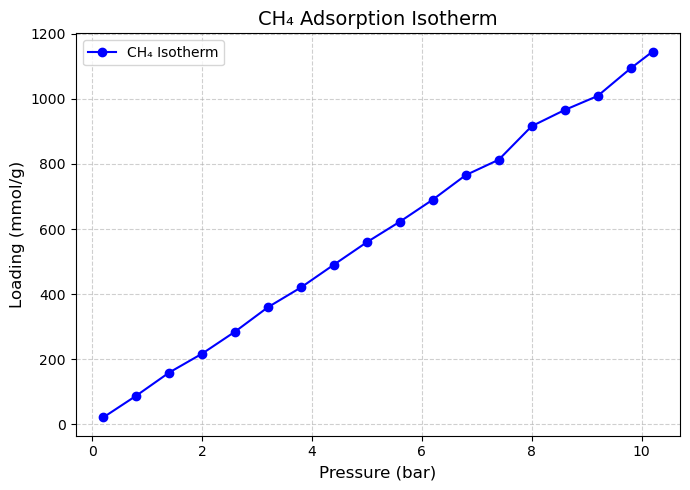

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,5))
plt.plot(df_iso_ch4["Pressure(bar)"], df_iso_ch4["Loading(mmol/g)"], 
         marker="o", linestyle="-", color="b", label="CH₄ Isotherm")

plt.xlabel("Pressure (bar)", fontsize=12)
plt.ylabel("Loading (mmol/g)", fontsize=12)
plt.title("CH₄ Adsorption Isotherm", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from ast import literal_eval


iso_dict = literal_eval(df_co2[df_co2["Key"] == "isotherm"]["Value"].values[0])


df_iso_co2 = pd.DataFrame({
    "Pressure(bar)": iso_dict["pressure"],
    "Loading(mmol/g)": [val * 1000 for val in iso_dict["loading_absolute_average"]] 
})

print(df_iso_co2.head())

   Pressure(bar)  Loading(mmol/g)
0            0.2       102.794861
1            0.8       396.211524
2            1.4       708.200096
3            2.0      1043.533426
4            2.6      1401.529678


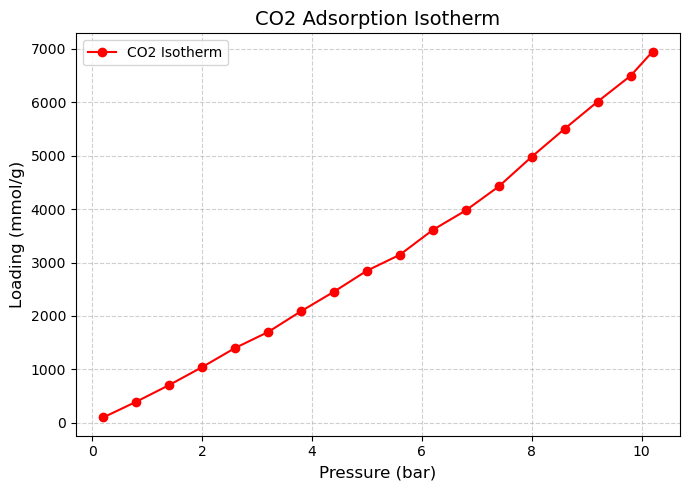

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,5))
plt.plot(df_iso_co2["Pressure(bar)"], df_iso_co2["Loading(mmol/g)"], 
         marker="o", linestyle="-", color="r", label="CO2 Isotherm")

plt.xlabel("Pressure (bar)", fontsize=12)
plt.ylabel("Loading (mmol/g)", fontsize=12)
plt.title("CO2 Adsorption Isotherm", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


***Q5- Binary mixture isotherm***


In realistic conditions, CH₄ and CO₂ are adsorbed **simultaneously** in porous materials. To predict mixture adsorption behavior from pure-component data, one widely used approach is **Ideal Adsorbed Solution Theory (IAST)**, first developed by Myers & Prausnitz (1965) [4]. The central idea is that the adsorbed phase behaves like an *ideal solution*, such that the spreading pressure is equal for all components at equilibrium.

Since the assignment did not specify a feed composition, we considered an **equimolar mixture (50% CH₄, 50% CO₂)**. This choice is justified because:

* It is a **standard benchmark** in adsorption studies, as it allows a balanced evaluation of selectivity between two components.
* It directly reflects the **intrinsic preference** of the material, without biasing toward one gas.
* While real biogas typically contains ~60% CH₄ and ~40% CO₂, starting from an equimolar assumption provides a clear baseline for comparison.

CH4 pressure range: 0.2 to 10.2 bar
CO2 pressure range: 0.2 to 10.2 bar
Using pressure range: 0.1 to 3.9 bar
                      Component 0: p^0 = 10.307556 > 10.200000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 0: p^0 = 10.899738 > 10.200000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.


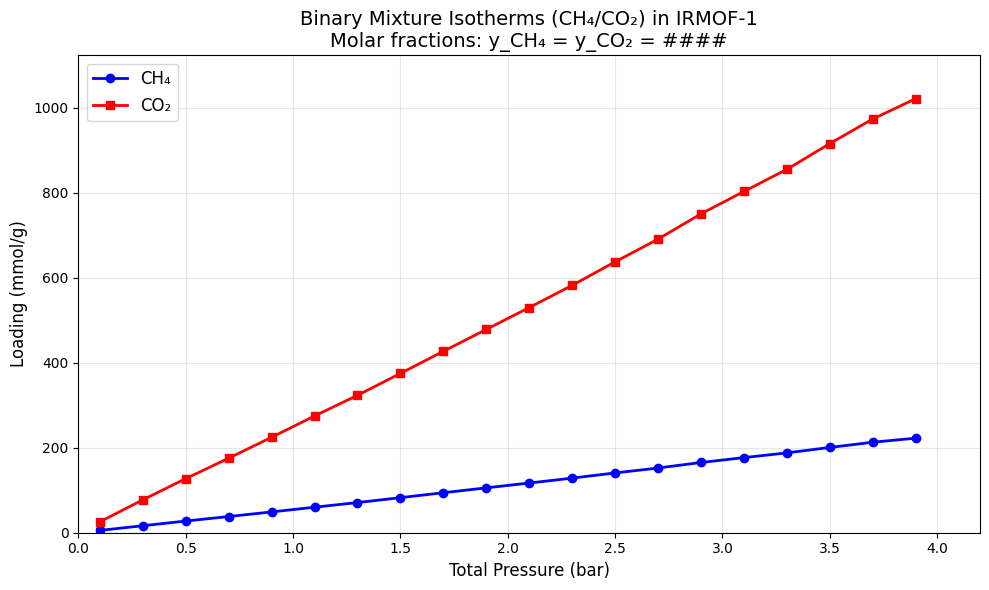


Binary Mixture Isotherm Results:
Pressure (bar)  CH4 Loading     CO2 Loading    
0.1             5.420           25.728         
0.5             27.484          127.276        
0.9             48.868          224.571        
1.3             70.984          323.247        
1.7             94.066          426.690        
2.1             116.907         529.665        
2.5             140.626         637.197        
2.9             165.208         750.120        
3.3             187.783         854.731        
3.7             212.868         973.160        
Total data points calculated: 20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd



ch4_isotherm = pyiast.InterpolatorIsotherm(df_iso_ch4,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)",
                                    fill_value=max(df_iso_ch4["Loading(mmol/g)"]))

co2_isotherm = pyiast.InterpolatorIsotherm(df_iso_co2,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)",
                                    fill_value=max(df_iso_ch4["Loading(mmol/g)"]))


print("CH4 pressure range:", df_iso_ch4['Pressure(bar)'].min(), "to", df_iso_ch4['Pressure(bar)'].max(), "bar")
print("CO2 pressure range:", df_iso_co2['Pressure(bar)'].min(), "to", df_iso_co2['Pressure(bar)'].max(), "bar")


max_safe_pressure = min(df_iso_ch4['Pressure(bar)'].max(), df_iso_co2['Pressure(bar)'].max()) * 0.8
pressures = np.arange(0.1, 4.1, 0.2)
print(f"Using pressure range: 0.1 to {pressures[-1]:.1f} bar")

# Define molar fractions (0.5 for both components in binary mixture)
y_ch4 = 0.5 # Molar fraction of CH4 in gas phase
y_co2 = 0.5 # Molar fraction of CO2 in gas phase

# Initialize arrays to store results
ch4_loadings = []
co2_loadings = []
successful_pressures = []

# Calculate binary mixture isotherms using IAST
for P_total in pressures:
    try:
        # Partial pressures
        P_ch4 = y_ch4 * P_total
        P_co2 = y_co2 * P_total
        
        # Check if partial pressures are within data range
        if P_ch4 <= df_iso_ch4['Pressure(bar)'].max() and P_co2 <= df_iso_co2['Pressure(bar)'].max():
            # Calculate mixture loadings using IAST
            partial_pressures = [P_ch4, P_co2]
            isotherms = [ch4_isotherm, co2_isotherm]
            
            # Use pyiast.iast to calculate mixture loadings
            q_mix = pyiast.iast(partial_pressures, isotherms, verboseflag=False)
            
            ch4_loadings.append(q_mix[0])  # CH4 loading
            co2_loadings.append(q_mix[1])  # CO2 loading
            successful_pressures.append(P_total)
        else:
            print(f"Skipping pressure {P_total:.1f} bar - outside data range")
            
    except Exception as e:
        print(f"Error at pressure {P_total:.1f} bar: {str(e)[:100]}...")
        continue

# Update pressures to only include successful calculations
pressures = np.array(successful_pressures)

# Convert to numpy arrays for easier handling
ch4_loadings = np.array(ch4_loadings)
co2_loadings = np.array(co2_loadings)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pressures, ch4_loadings, 'b-', marker='o', linewidth=2, markersize=6, label='CH₄')
plt.plot(pressures, co2_loadings, 'r-', marker='s', linewidth=2, markersize=6, label='CO₂')

plt.xlabel('Total Pressure (bar)', fontsize=12)
plt.ylabel('Loading (mmol/g)', fontsize=12)
plt.title('Binary Mixture Isotherms (CH₄/CO₂) in IRMOF-1\nMolar fractions: y_CH₄ = y_CO₂ = 0.5', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 4.2)
plt.ylim(0, max(max(ch4_loadings), max(co2_loadings)) * 1.1)

# Add some styling
plt.tight_layout()
plt.show()

# Print some results for verification
print("\nBinary Mixture Isotherm Results:")
print("="*50)
print(f"{'Pressure (bar)':<15} {'CH4 Loading':<15} {'CO2 Loading':<15}")
print("="*50)
for i in range(0, len(pressures), max(1, len(pressures)//8)):  # Print ~8 points
    print(f"{pressures[i]:<15.1f} {ch4_loadings[i]:<15.3f} {co2_loadings[i]:<15.3f}")
print("="*50)
print(f"Total data points calculated: {len(pressures)}")

***Code explained***

* To make the data compatible with IAST, the pure-component isotherms were passed into `pyiast.InterpolatorIsotherm`.
* This constructs a *piecewise-linear model* directly from the data, ensuring the mixture calculations are based on the actual simulation values without fitting assumptions.
* A `fill_value` was provided to prevent extrapolation beyond the measured range.

**Mixture setup**

* Gas-phase mole fractions were set as:

  $$
  y_{\mathrm{CH_4}} = 0.5, \quad y_{\mathrm{CO_2}} = 0.5
  $$
* A pressure grid from *0.1 to 4.0 bar* with increments of *0.2 bar* was defined.

**IAST calculation**

* For each total pressure $P$, the *partial pressures* were calculated:

  $$
  P_{\mathrm{CH_4}} = y_{\mathrm{CH_4}} \cdot P, \quad P_{\mathrm{CO_2}} = y_{\mathrm{CO_2}} \cdot P
  $$
* The function `pyiast.iast()` was then called with the partial pressures and pure isotherm models.
* This function solved the IAST equations, yielding the *mixture loadings* $q_{\mathrm{CH_4}}$ and $q_{\mathrm{CO_2}}$.
* A check ensured that all partial pressures remained within the bounds of the pure-component data.

**Visualization and output**

* The calculated mixture loadings were plotted as *adsorption isotherms*:

  * $q_{\mathrm{CH_4}}(P)$: blue line with circle markers.
  * $q_{\mathrm{CO_2}}(P)$: red line with square markers.
* The script also printed selected pressure–loading pairs for verification.


**Results**

* The *binary mixture isotherms* clearly show that CO₂ is adsorbed in significantly larger quantities than CH₄ across the entire pressure range.
* This behavior is consistent with the earlier analysis of Henry coefficients and pure isotherms, both of which indicated stronger affinity of IRMOF-1 for CO₂.


***Conclusion***

Using IAST with the *equimolar CH₄/CO₂ feed* provided a robust prediction of binary mixture adsorption in IRMOF-1. The results indeed confirmed the *preferential adsorption of CO₂*. 

***Q6- Selectivity of CO2 over CH4***

**Definition & formula**

For a binary gas at total pressure $P$ and temperature $T$, the **selectivity of CO₂ over CH₄** is defined as

$$
S_{\mathrm{CO_2/CH_4}} \;=\; \frac{(x_{\mathrm{CO_2}}/x_{\mathrm{CH_4}})}{(y_{\mathrm{CO_2}}/y_{\mathrm{CH_4}})},
$$

where $y_i$ are **gas-phase** mole fractions and $x_i$ are **adsorbed-phase** mole fractions.
With an **equimolar feed** ($y_{\mathrm{CO_2}}=y_{\mathrm{CH_4}}=0.5$), this simplifies to

$$
S_{\mathrm{CO_2/CH_4}} \;=\; \frac{x_{\mathrm{CO_2}}}{x_{\mathrm{CH_4}}}.
$$

In [7]:
print("\n" + "="*60)
print("SELECTIVITY CALCULATIONS")
print("="*60)

# Define specific pressures for selectivity calculation
selectivity_pressures = [0.1, 1.0, 2.0, 3.0]

print("Selectivity formula: S_CO2/CH4 = (x_CO2/x_CH4) / (y_CO2/y_CH4)")
print("Where x = mole fraction in adsorbed phase, y = mole fraction in gas phase")
print("Since y_CO2 = y_CH4 = 0.5, then S = x_CO2/x_CH4")
print()

selectivities = []
for P_target in selectivity_pressures:
    # Interpolate loadings at the exact target pressure
    q_CH4 = np.interp(P_target, pressures, ch4_loadings)
    q_CO2 = np.interp(P_target, pressures, co2_loadings)
    
    # Calculate total loading and mole fractions in adsorbed phase
    q_total = q_CH4 + q_CO2
    x_CH4 = q_CH4 / q_total
    x_CO2 = q_CO2 / q_total
    
    # Calculate selectivity
    selectivity = x_CO2 / x_CH4
    selectivities.append(selectivity)
    
    print(f"At P = {P_target:.1f} bar:")
    print(f"  CH4 loading: {q_CH4:.3f} mmol/g")
    print(f"  CO2 loading: {q_CO2:.3f} mmol/g")
    print(f"  x_CH4 (adsorbed): {x_CH4:.3f}")
    print(f"  x_CO2 (adsorbed): {x_CO2:.3f}")
    print(f"  Selectivity S_CO2/CH4: {selectivity:.2f}")
    print()

# Analysis of selectivity trend
print("SELECTIVITY ANALYSIS:")
print("="*30)
print(f"{'Pressure (bar)':<15} {'Selectivity':<12}")
print("-" * 27)
for P, S in zip(selectivity_pressures, selectivities):
    print(f"{P:<15.1f} {S:<12.2f}")

print(f"\nSelectivity trend: {selectivities[0]:.2f} → {selectivities[-1]:.2f}")
if selectivities[-1] < selectivities[0]:
    print("✓ Selectivity DECREASES with pressure")
    print("This indicates that at higher pressures, CH4 competes more effectively")
    print("for adsorption sites, reducing the preferential adsorption of CO2.")
elif selectivities[-1] > selectivities[0]:
    print("✓ Selectivity INCREASES with pressure")
    print("CO2 maintains its adsorption advantage even at higher pressures.")
else:
    print("✓ Selectivity remains relatively CONSTANT with pressure")

print(f"\nConclusion: CO2 is preferentially adsorbed over CH4 by a factor of")
print(f"{min(selectivities):.1f}-{max(selectivities):.1f}x across the pressure range studied.")



SELECTIVITY CALCULATIONS
Selectivity formula: S_CO2/CH4 = (x_CO2/x_CH4) / (y_CO2/y_CH4)
Where x = mole fraction in adsorbed phase, y = mole fraction in gas phase
Since y_CO2 = y_CH4 = 0.5, then S = x_CO2/x_CH4

At P = 0.1 bar:
  CH4 loading: 5.420 mmol/g
  CO2 loading: 25.728 mmol/g
  x_CH4 (adsorbed): 0.174
  x_CO2 (adsorbed): 0.826
  Selectivity S_CO2/CH4: 4.75

At P = 1.0 bar:
  CH4 loading: 54.435 mmol/g
  CO2 loading: 249.590 mmol/g
  x_CH4 (adsorbed): 0.179
  x_CO2 (adsorbed): 0.821
  Selectivity S_CO2/CH4: 4.59

At P = 2.0 bar:
  CH4 loading: 111.226 mmol/g
  CO2 loading: 503.956 mmol/g
  x_CH4 (adsorbed): 0.181
  x_CO2 (adsorbed): 0.819
  Selectivity S_CO2/CH4: 4.53

At P = 3.0 bar:
  CH4 loading: 170.956 mmol/g
  CO2 loading: 776.420 mmol/g
  x_CH4 (adsorbed): 0.180
  x_CO2 (adsorbed): 0.820
  Selectivity S_CO2/CH4: 4.54

SELECTIVITY ANALYSIS:
Pressure (bar)  Selectivity 
---------------------------
0.1             4.75        
1.0             4.59        
2.0             4.5

**Code explanation**
1. *Use IAST mixture isotherms:* From the earlier step,  *mixture loadings* $q_{\mathrm{CH_4}}(P)$ and $q_{\mathrm{CO_2}}(P)$ were computed for an equimolar CO₂/CH₄ feed on a pressure grid $P=0.1$–4.0 bar (Δ0.2) using `pyiast.iast(...)` with *InterpolatorIsotherm* (linear interpolation of pure isotherms).
2. *Interpolate to target pressures:* For each target $P=\{0.1,1,2,3\}$ bar,  the mixture loadings were interpolated to get $q_{\mathrm{CH_4}}$ and $q_{\mathrm{CO_2}}$.

3. *Convert loadings to adsorbed composition:*

   $$
   x_{\mathrm{CH_4}}=\frac{q_{\mathrm{CH_4}}}{q_{\mathrm{CH_4}}+q_{\mathrm{CO_2}}},\quad
   x_{\mathrm{CO_2}}=\frac{q_{\mathrm{CO_2}}}{q_{\mathrm{CH_4}}+q_{\mathrm{CO_2}}}.
   $$

4. *Compute selectivity:* $S_{\mathrm{CO_2/CH_4}} = x_{\mathrm{CO_2}}/x_{\mathrm{CH_4}}$ (since $y$ are equal).

**Conclusions**

* *CO₂ is preferentially adsorbed*: Selectivity $S\gg1$ shows the adsorbent strongly favors CO₂ over CH₄ under equimolar feed at 300 K.
* *Mild decrease with pressure*: The small drop in $S$ with increasing $P$ suggests *CH₄ competes slightly better* at higher surface coverage, though CO₂ dominance remains clear in this range.

**Notes & reproducibility**

* Selectivity depends on *feed composition*; for non-equimolar feeds the denominator $(y_{\mathrm{CO_2}}/y_{\mathrm{CH_4}})$ changes and so will $S$.
* Results originate from *IAST on interpolated pure isotherms*; using fitted models (e.g., Langmuir/DSL) may slightly change the numbers but should preserve the *CO₂ ≫ CH₄* trend.